In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing



In [5]:
df=fetch_california_housing()


In [6]:
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
#dependant (Y) and independent(X)
x=dataset
y=df.target


In [8]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



In [10]:
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

In [11]:
from sklearn.linear_model import LinearRegression


In [12]:
model=LinearRegression()


In [13]:
model=model.fit(Xtrain,Ytrain)

In [14]:
from sklearn.model_selection import cross_val_score


In [15]:
mse=cross_val_score(model,Xtrain,Ytrain,scoring='neg_mean_squared_error', cv=10)
np.mean(mse)

-0.5257104326777

In [16]:
reg_predict=model.predict(Xtest)

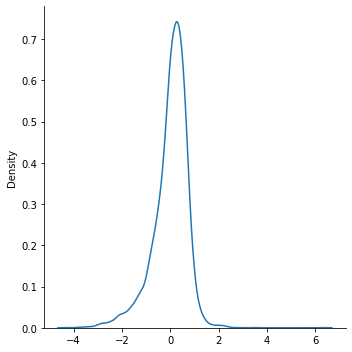

In [17]:
import seaborn as sns
sns.displot(reg_predict-Ytest,kind="kde")

In [18]:
from sklearn.metrics import r2_score
score=r2_score(reg_predict,Ytest)
score


0.37731023013299636

<AxesSubplot:ylabel='Count'>

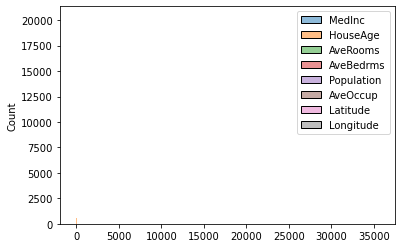

In [19]:

sns.histplot(dataset)